# Penser à faire un requirements.txt avec l'env !

-- > Mettre le tout en POO avec classe stock = plus sympa pour une UI si continuité projet

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import pandas as pd 
import plotly.express as px          # Super lib, mieux que matplotlib data vis
import plotly.graph_objects as go    # Pour faire des bougies, c'est magnifique
# nbformat, ipykernel, cufflinks (je sais meme plus ce que c'est)

# Importer les données

In [15]:
start_date = '2020-01-01'
end_date = '2024-10-10'

# Dans l'ordre, Kering-LVMH-Hermès-Richemont-Intel-Apple-Nvidia
tickers_symbols = ["KER.PA", "MC.PA", "RMS.PA", "CFR.SW", "INTC", "AAPL", "NVDA"]
tickers = []
for symbol in tickers_symbols:
    tickers.append(yf.Ticker(symbol))

# Dico avec tout les DF séparés
stocks_dico={}
for i in range(0, len(tickers)):

    # Petite rallonge pour changer le format de la date en yyyy-mm-dd
    data = tickers[i].history(start=start_date, end=end_date)
    data.index = data.index.strftime('%Y-%m-%d')

    # Limiter à 2 chiffres après virgules
    numeric_cols = data.select_dtypes('float64').columns  # Sélectionner les colonnes numériques
    data[numeric_cols] = data[numeric_cols].round(2)  # Appliquer l'arrondi uniquement aux colonnes numériques
    

    #Stockage dico
    stocks_dico[tickers_symbols[i]] = data


Structure donnée : On a un dictionnaire avec comme clé les symboles des stocks et comme valeur les DataFrammes

In [16]:
# Print de vérification
for key, value in stocks_dico.items():
    print(f"Ticker: {key}")
    print(value.head(2))
    print("\n")

Ticker: KER.PA
              Open    High     Low   Close  Volume  Dividends  Stock Splits
Date                                                                       
2020-01-02  518.68  523.32  517.37  523.32  178651        0.0           0.0
2020-01-03  520.70  525.86  518.51  525.86  159019        0.0           0.0


Ticker: MC.PA
              Open    High     Low   Close  Volume  Dividends  Stock Splits
Date                                                                       
2020-01-02  391.80  395.08  390.30  392.88  347226        0.0           0.0
2020-01-03  390.86  392.83  388.15  392.83  291716        0.0           0.0


Ticker: RMS.PA
              Open    High     Low   Close  Volume  Dividends  Stock Splits
Date                                                                       
2020-01-02  650.56  654.44  646.10  650.76   42679        0.0           0.0
2020-01-03  649.01  655.02  647.07  655.02   33911        0.0           0.0


Ticker: CFR.SW
             Open   Hig

In [17]:
# Créer un gros Dataframe avec tout les stocks
stocks = pd.concat(stocks_dico, axis=1)

# Vérification structure données et types, important !

Nous avons un **Multi-index Dataframe, waou !**

In [18]:
stocks.head()

KER.PA                                                           \
              Open    High     Low   Close    Volume Dividends Stock Splits   
Date                                                                          
2020-01-02  518.68  523.32  517.37  523.32  178651.0       0.0          0.0   
2020-01-03  520.70  525.86  518.51  525.86  159019.0       0.0          0.0   
2020-01-06  521.31  523.67  511.07  517.02  176511.0       0.0          0.0   
2020-01-07  519.38  526.30  519.30  521.83  201861.0       0.0          0.0   
2020-01-08  511.94  522.71  504.33  522.71  201239.0       0.0          0.0   

             MC.PA                  ...         AAPL                         \
              Open    High     Low  ...       Volume Dividends Stock Splits   
Date                                ...                                       
2020-01-02  391.80  395.08  390.30  ...  135480400.0       0.0          0.0   
2020-01-03  390.86  392.83  388.15  ...  146322800.0       0.0          0.0   
2020-01-06  388.99  390.11  382.99  ...  118387200.0       0.0          0.0   
2020-01-07  391.43  395.13  389.36  ...  108872000.0       0.0          0.0   
2020-01-08  388.71  392.55  387.63  ...  132079200.0       0.0          0.0   

            NVDA                                                        
            Open  High   Low Close       Volume Dividends Stock Splits  
Date                                                                    
2020-01-02  5.94  5.97  5.89  5.97  237536000.0       0.0          0.0  
2020-01-03  5.85  5.92  5.83  5.88  205384000.0       0.0          0.0  
2020-01-06  5.78  5.91  5.76  5.90  262636000.0       0.0          0.0  
2020-01-07  5.93  6.02  5.89  5.97  314856000.0       0.0          0.0  
2020-01-08  5.97  6.03  5.93  5.98  277108000.0       0.0          0.0  

[5 rows x 49 columns]

In [19]:
stocks.shape

(1235, 49)

In [20]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1235 entries, 2020-01-02 to 2024-05-01
Data columns (total 49 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   (KER.PA, Open)          1226 non-null   float64
 1   (KER.PA, High)          1226 non-null   float64
 2   (KER.PA, Low)           1226 non-null   float64
 3   (KER.PA, Close)         1226 non-null   float64
 4   (KER.PA, Volume)        1226 non-null   float64
 5   (KER.PA, Dividends)     1226 non-null   float64
 6   (KER.PA, Stock Splits)  1226 non-null   float64
 7   (MC.PA, Open)           1226 non-null   float64
 8   (MC.PA, High)           1226 non-null   float64
 9   (MC.PA, Low)            1226 non-null   float64
 10  (MC.PA, Close)          1226 non-null   float64
 11  (MC.PA, Volume)         1226 non-null   float64
 12  (MC.PA, Dividends)      1226 non-null   float64
 13  (MC.PA, Stock Splits)   1226 non-null   float64
 14  (RMS.PA, Open)          1226 n

In [21]:
# Statistiques descriptives
stats_descriptives = stocks.describe()
stats_descri_transposed = stats_descriptives.T.round(1) 
stats_descri_transposed["max"] = stats_descri_transposed["max"].astype(int)
stats_descri_transposed 

count         mean          std         min  \
KER.PA Open          1226.0        482.5        103.7       220.8   
       High          1226.0        488.4        104.5       222.0   
       Low           1226.0        476.5        102.9       218.4   
       Close         1226.0        482.4        103.7       221.9   
       Volume        1226.0     216141.3     109248.7     13937.0   
       Dividends     1226.0          0.1          0.6         0.0   
       Stock Splits  1226.0          0.0          0.0         0.0   
MC.PA  Open          1226.0        615.4        150.1       273.0   
       High          1226.0        622.0        151.0       280.3   
       Low           1226.0        608.5        149.1       261.2   
       Close         1226.0        615.5        150.0       269.9   
       Volume        1226.0     441623.3     273016.3     48392.0   
       Dividends     1226.0          0.0          0.4         0.0   
       Stock Splits  1226.0          0.0          0.0         0.0   
RMS.PA Open          1226.0       1383.1        515.4       515.2   
       High          1226.0       1398.5        519.8       541.3   
       Low           1226.0       1367.3        510.2       501.6   
       Close         1226.0       1383.7        515.0       510.4   
       Volume        1226.0      62952.3      39101.4      8388.0   
       Dividends     1226.0          0.0          0.5         0.0   
       Stock Splits  1226.0          0.0          0.0         0.0   
CFR.SW Open          1206.0        103.0         28.4        43.9   
       High          1206.0        104.2         28.6        45.4   
       Low           1206.0        101.7         28.1        40.8   
       Close         1206.0        103.0         28.3        45.1   
       Volume        1206.0    1465608.2    1094904.6    357997.0   
       Dividends     1206.0          0.0          0.1         0.0   
       Stock Splits  1206.0          0.0          0.0         0.0   
INTC   Open          1201.0         41.0         10.2        19.0   
       High          1201.0         41.5         10.3        19.1   
       Low           1201.0         40.4         10.1        18.5   
       Close         1201.0         41.0         10.2        18.9   
       Volume        1201.0   39166454.3   23192751.1  11314900.0   
       Dividends     1201.0          0.0          0.0         0.0   
       Stock Splits  1201.0          0.0          0.0         0.0   
AAPL   Open          1201.0        148.4         38.7        55.5   
       High          1201.0        150.0         38.9        55.6   
       Low           1201.0        146.8         38.5        51.7   
       Close         1201.0        148.5         38.8        54.6   
       Volume        1201.0   92767698.5   53379953.9  24048300.0   
       Dividends     1201.0          0.0          0.0         0.0   
       Stock Splits  1201.0          0.0          0.1         0.0   
NVDA   Open          1201.0         33.6         32.0         5.0   
       High          1201.0         34.3         32.6         5.2   
       Low           1201.0         33.0         31.3         4.5   
       Close         1201.0         33.7         32.0         4.9   
       Volume        1201.0  457778933.6  184627047.2  97884000.0   
       Dividends     1201.0          0.0          0.0         0.0   
       Stock Splits  1201.0          0.0          0.3         0.0   

                             25%          50%          75%         max  
KER.PA Open                417.5        488.6        540.5         728  
       High                423.3        495.2        547.8         730  
       Low                 410.0        484.2        533.5         721  
       Close               416.5        490.6        539.8         725  
       Volume           149630.2     193406.5     246757.5     1239724  
       Dividends             0.0          0.0          0.0           9  
       Stock Splits          0.0          0.0          0.0  

C'est dégeu mais on voit bien les **data gaps**

<Axes: xlabel='None-None', ylabel='Date'>

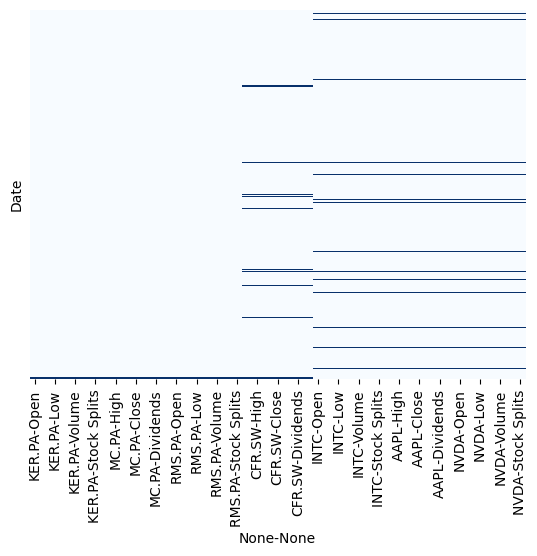

In [22]:
sns.heatmap(stocks.isnull(), yticklabels=False, cbar=False, cmap="Blues")

# Data Visualization

In [23]:
# Closing Prices Over Time
closing_price_df = pd.DataFrame()

for stock in stocks.columns.levels[0]:  # Itérer sur les niveaux du multi-index
    closing_price_df[stock] = stocks[stock]['Close'] 


closing_price_df

,KER.PA,MC.PA,RMS.PA,CFR.SW,INTC,AAPL,NVDA
Date,,,,,,,
2020-01-02,523.32,392.88,650.76,NaN,53.67,72.88,5.97
2020-01-03,525.86,392.83,655.02,69.92,53.01,72.17,5.88
2020-01-06,517.02,389.13,649.59,68.71,52.86,72.74,5.90
2020-01-07,521.83,389.93,657.74,69.92,51.98,72.40,5.97
2020-01-08,522.71,392.55,663.56,69.94,52.02,73.57,5.98
...,...,...,...,...,...,...,...
2023-04-10,NaN,NaN,NaN,NaN,31.74,160.77,27.57
2023-05-01,NaN,NaN,NaN,NaN,29.57,168.27,28.90
2023-12-26,NaN,NaN,NaN,NaN,49.83,192.32,49.27


Affichage séries temporelles

In [24]:
fig = px.line(closing_price_df, x=closing_price_df.index, y=closing_price_df.columns, title="Adjusted Closing Prices")
fig.update_layout(hovermode='x',yaxis_title="Price")  # Survol souris
fig.show()

L'heure des bougies !

In [30]:
fig = go.Figure()
for symbol in tickers_symbols:
    df = stocks_dico[symbol]  
    fig.add_trace(go.Candlestick(       # Utilisé pour ajouter 1 série à une figure
        x=df.index,
        open=df['Open'],
        high=df['High'],
        low=df['Low'],
        close=df['Close'],
        name=symbol 
    ))

fig.update_layout(
    title='Candlestick chart, please select 1 stock for better visualisation guyyys',
    xaxis_title='Date',
    yaxis_title='Prix',
    xaxis_rangeslider_visible=True  # Activer le sélecteur de plage
)

fig.show()

# To DO 

-- > Reconnaissance Pattern   
-- > Mieux explorer Plotly pour comprendre fonctionnement et améliore visibilité, couleurs etc  
-- > Faire une table de correspondance pour avoir des noms jolies plutot que les abréviations des stocks